### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Nicotine` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [15]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Nicotine` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [16]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Nicotine','Unnamed: 0'],axis=1)
y = df['Nicotine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [17]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.7248034310221587
Test score: 0.6745182012847966


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Coefficient analysis <a id='Coef'></a>

In [18]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.83249259]
Coefficients: [0.99626401 0.99463914 1.00568978 1.00548761 0.97081555 1.73470627
 1.49915283 1.02187109 1.09729519 1.45723497 1.5307776  2.44053207
 3.94977979 0.71625635 1.62434526 1.08935013 1.2561315  0.96179119
 1.76288163 0.95210272 0.69756239 1.01604107 0.6153856  1.05206831
 0.94288053 0.84885559 0.98637676 0.76172232 1.69577271 1.57841441
 1.19143219 0.777386   0.73342122 0.96076344 0.98306614 0.64007749
 1.26505699 1.15342689 1.08045822 0.70850463 0.85852727 0.87311553
 0.77153398 0.98053893 0.95651212 0.93476146 1.3466344  1.00595592
 0.91376982]


<Figure size 640x480 with 0 Axes>

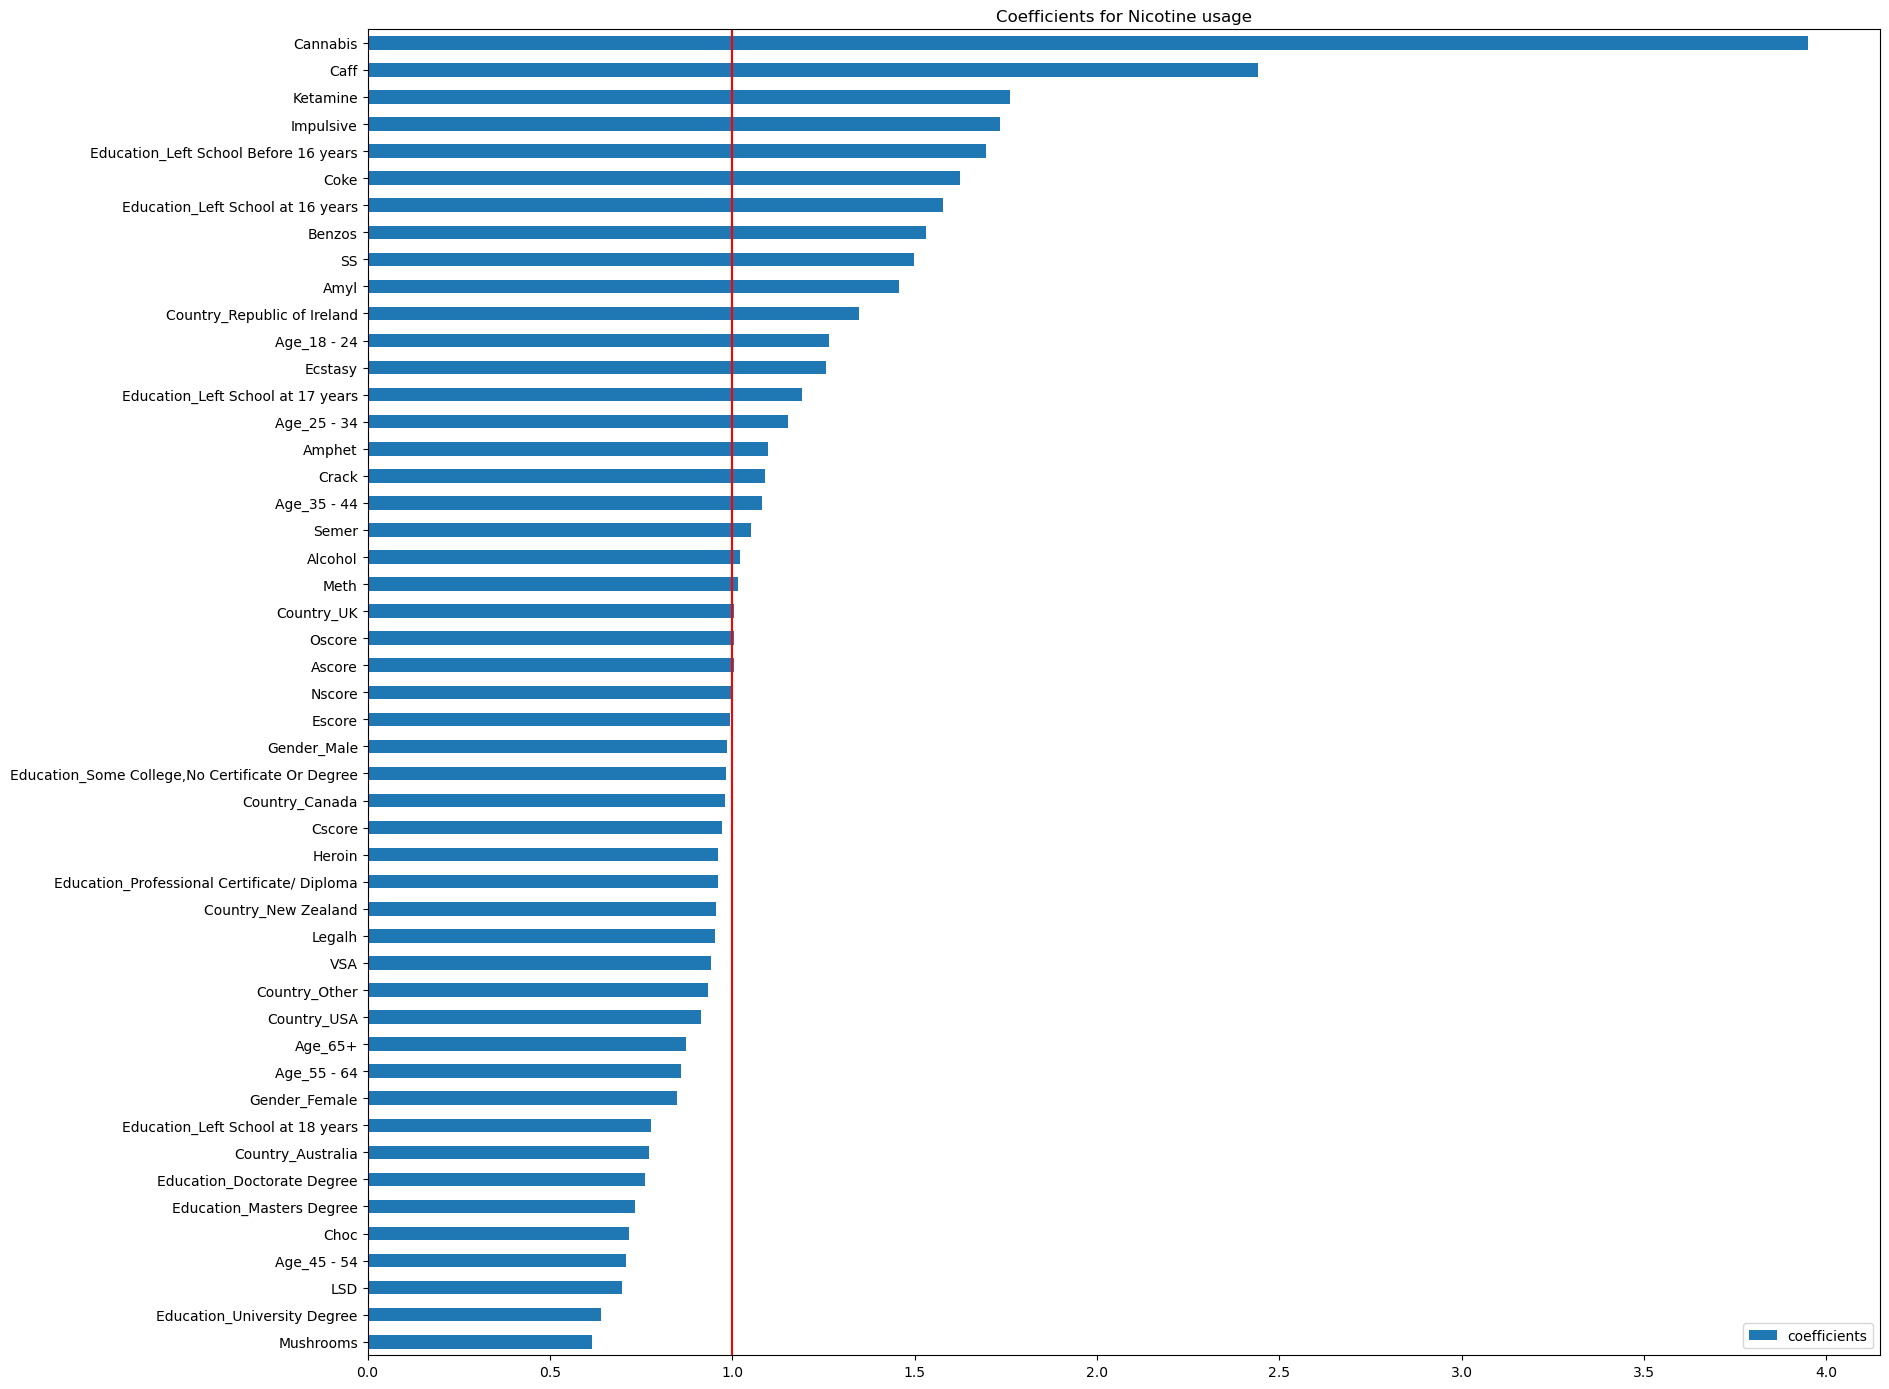

In [19]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Nicotine usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The summary of the results indicates the coefficients of various features in the model, showing their respective impacts on the outcome. Features such as Cannabis, Caff, Ketamine, and Impulsive have the highest coefficients, suggesting they strongly influence the predicted outcome. On the other hand, Mushrooms, Education at various levels, and demographic factors like Age and Gender exhibit lower coefficients, indicating comparatively lesser impact on the predicted outcome. These coefficients provide valuable insights into which variables are most influential in the model's predictions, aiding in understanding the relative importance of different features in the dataset.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[178,  74],
       [ 78, 137]])

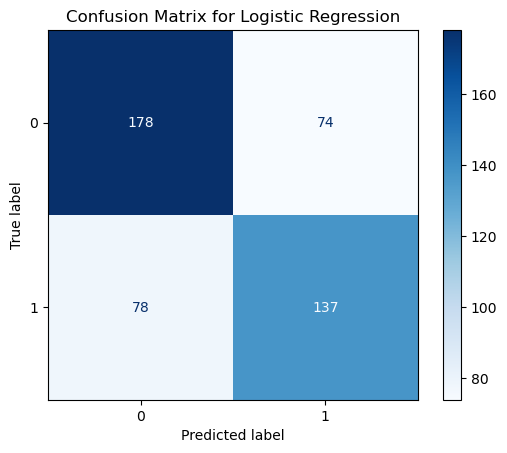

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       252
           1       0.65      0.64      0.64       215

    accuracy                           0.67       467
   macro avg       0.67      0.67      0.67       467
weighted avg       0.67      0.67      0.67       467



In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary
The logistic regression model in its base form achieved a training score of 0.725 and a test score of 0.675, indicating moderate performance. The precision for class 0 (not belonging to the target class) was 0.70, with a recall of 0.71 and an F1-score of 0.70, based on support for 252 instances. For class 1 (belonging to the target class), precision was 0.65, recall was 0.64, and the F1-score was 0.64, based on support for 215 instances.

Overall accuracy was 0.67, indicating that the model correctly predicted about two-thirds of the cases. The macro-average for precision, recall, and F1-score was 0.67, suggesting a balanced performance across both classes, while the weighted average, also at 0.67, affirmed this balanced performance across the entire dataset. These results indicate that the base logistic regression model provides reasonable predictive capability, although there is room for improvement, especially in enhancing recall for class 1. Further model tuning or alternative approaches such as feature engineering or resampling techniques could potentially enhance overall performance and address specific class-related challenges.


### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 0.1}
Best cross-validation score for Logistic Regression: 0.70
Test set score for Logistic Regression: 0.68

Confusion Matrix:
 [[169  83]
 [ 67 148]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       252
           1       0.64      0.69      0.66       215

    accuracy                           0.68       467
   macro avg       0.68      0.68      0.68       467
weighted avg       0.68      0.68      0.68       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.70
Test set score for Logistic Regression: 0.68

Confusion Matrix:
 [[178  74]
 [ 75 140]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       252
           1       0.65      0.65      0.65       215

    

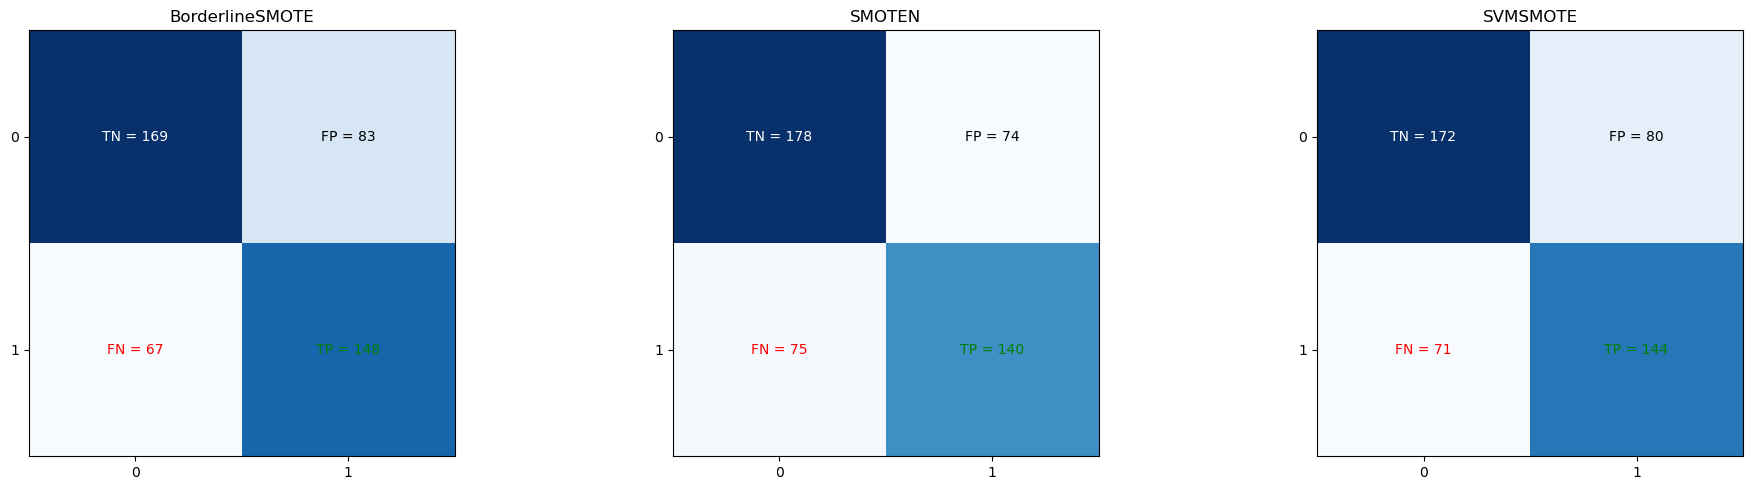

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority'))
   # ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()





### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

The results from applying BorderlineSMOTE, SMOTEN, and SVMSMOTE techniques to logistic regression models reveal consistent performance across various metrics. Each SMOTE variant employed the best logistic regression parameter (C) values of 0.1 or 1, achieving similar cross-validation scores of 0.70 and test set accuracies of 0.68. Across all methods, precision for predicting non-target cases (class 0) ranged from 0.70 to 0.72, with recalls between 0.67 and 0.71. For the target class (class 1), precision varied from 0.64 to 0.65, with recalls from 0.65 to 0.69. These results indicate stable performance in predicting both classes, with macro and weighted average F1-scores consistently at 0.68, suggesting balanced performance across the dataset. Overall, while these techniques improved class distribution balance and maintained consistent model accuracy, further optimizations or alternative approaches may be considered to enhance performance metrics, particularly focusing on achieving higher recall rates for the minority class.

### Logistic Regression with SVMSMOTE <a id='logreg_ADA'></a>

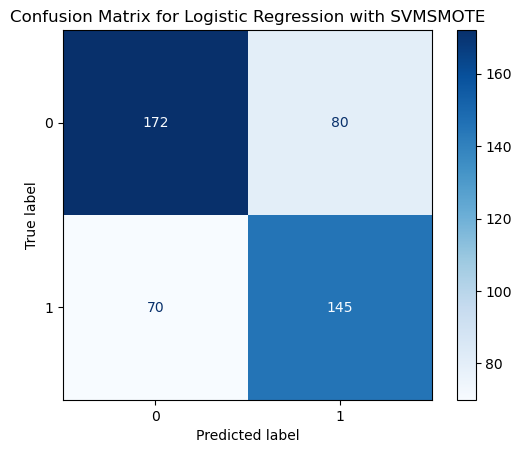

Best parameters for Logistic Regression:  {'C': 1, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.71


In [40]:
## Model with BorderlineSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = SVMSMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with SVMSMOTE")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [26]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

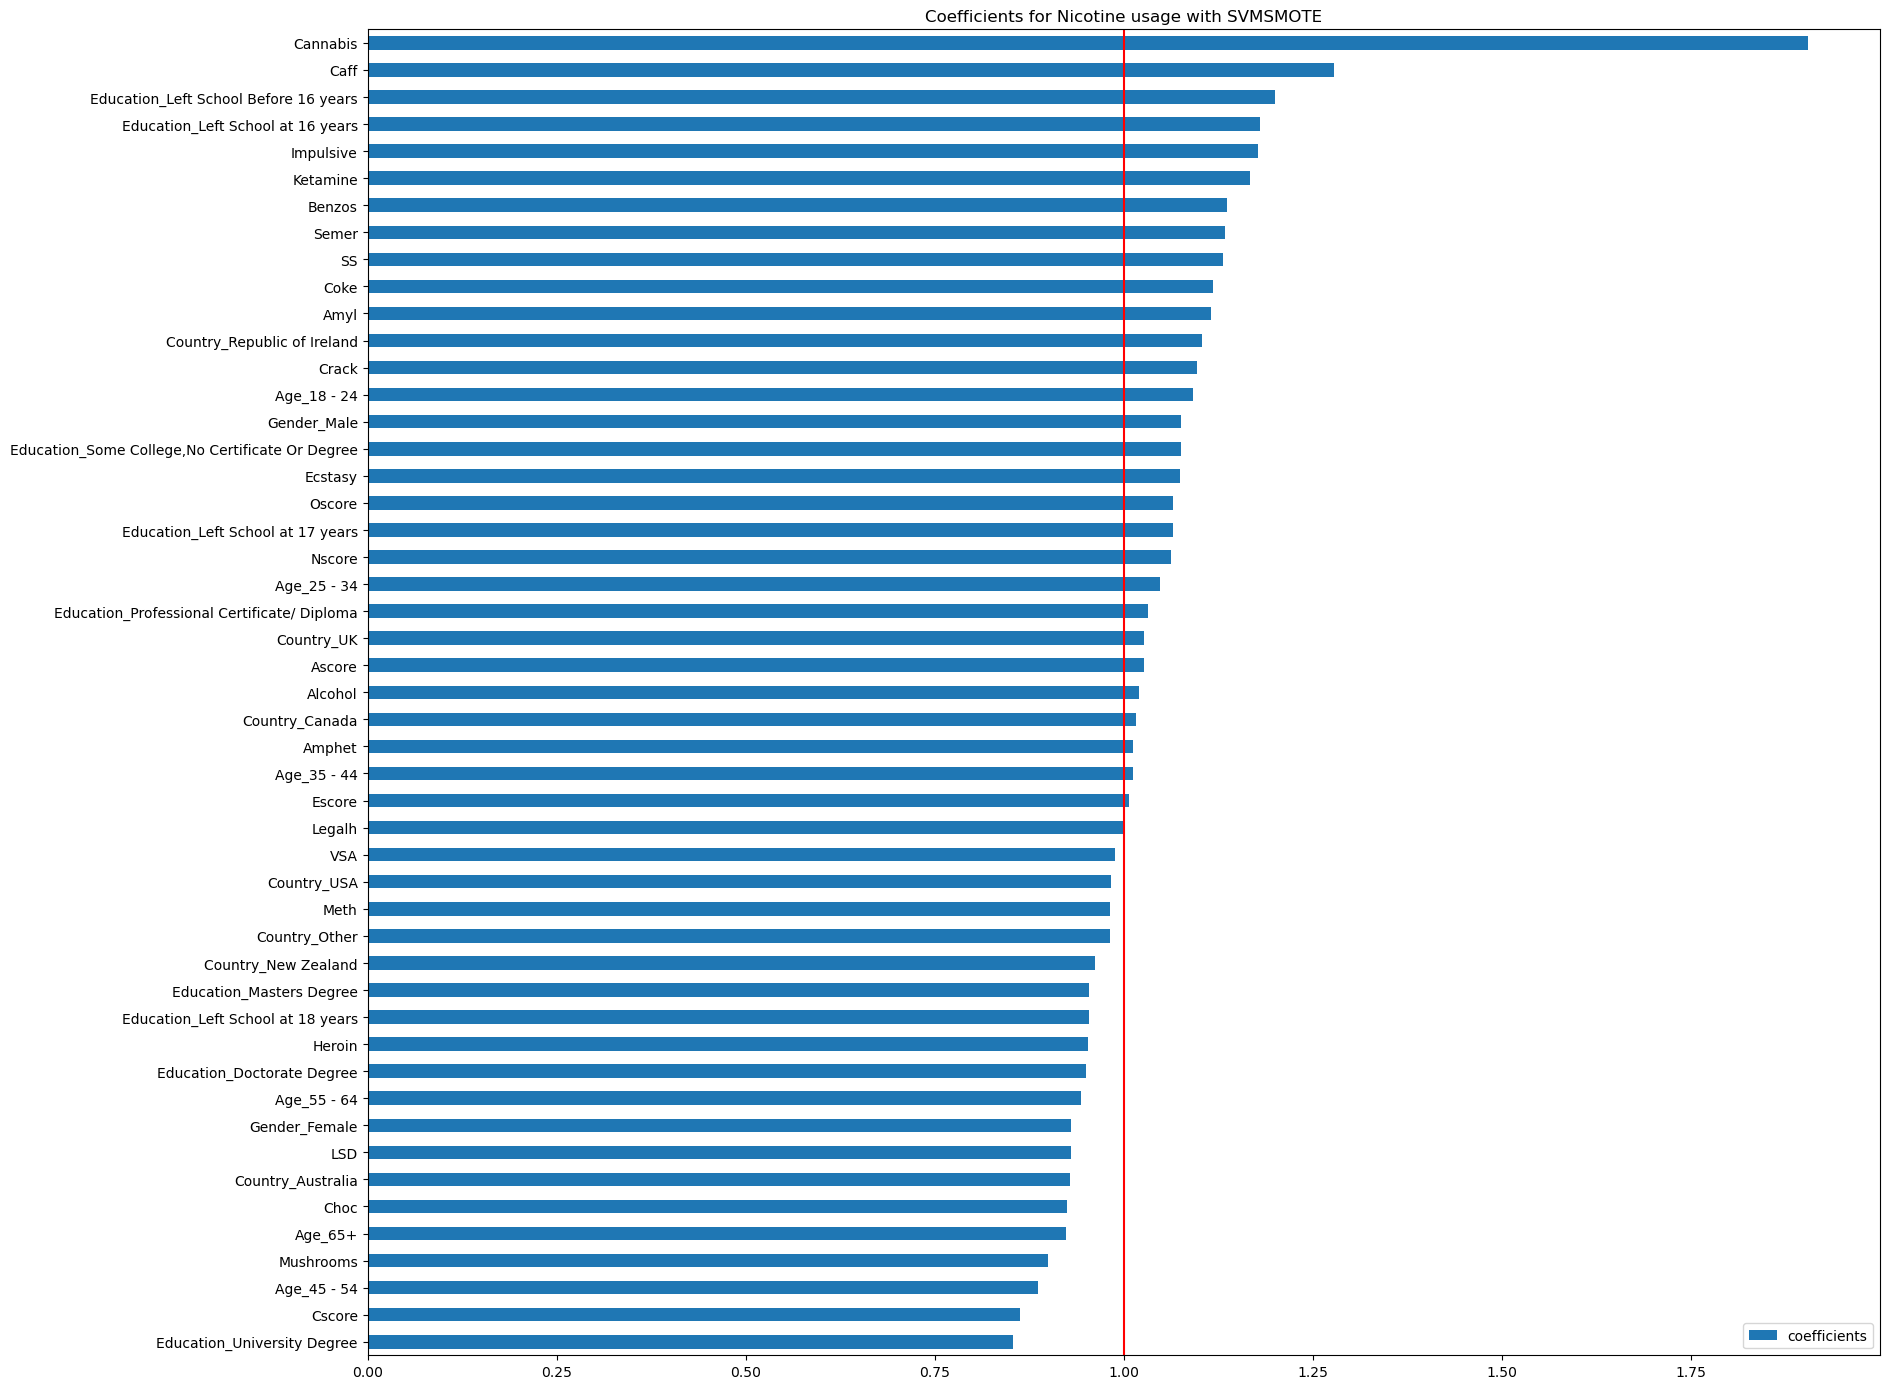

In [27]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Nicotine usage with SVMSMOTE")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

The coefficients provided indicate the relative importance of different features in the model's predictions. Features such as Cannabis, Caff, Ketamine, and Impulsive have the highest coefficients, suggesting they strongly influence the predicted outcome. On the other hand, demographic factors like Education level, Age categories, Gender, and Country of residence also exhibit significant coefficients, indicating their meaningful contribution to the model. These coefficients provide valuable insights into which variables are most influential in predicting the target outcome, highlighting potential areas for further exploration or focus in understanding the underlying factors driving the predictions.

### Decision Tree <a id='DT'></a>

In [31]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.6081370449678801


,Predicted Non-user,Predicted User
True Non-User,433,12
True User,17,5


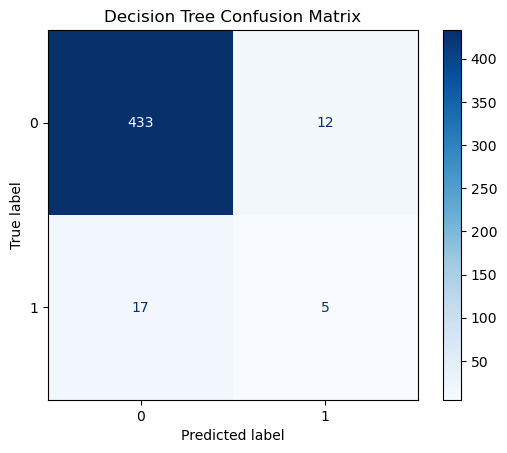

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       445
           1       0.29      0.23      0.26        22

    accuracy                           0.94       467
   macro avg       0.63      0.60      0.61       467
weighted avg       0.93      0.94      0.93       467



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The classification results show a strong performance in predicting class 0, with a precision of 0.96 and recall of 0.97, resulting in an F1-score of 0.97, based on support for 445 instances. However, the model's ability to predict class 1 is weaker, with a precision of 0.29, recall of 0.23, and F1-score of 0.26, based on support for 22 instances. The overall accuracy of the model is 0.94, indicating that it correctly predicts approximately 94% of the cases. In the context of both classes, the macro-average F1-score is 0.61, suggesting a moderate performance across all classes, while the weighted average F1-score, at 0.93, reflects the model's stronger performance due to the larger support for class 0. These results indicate that while the model performs very well in predicting the majority class (class 0), it struggles with the minority class (class 1), which may require further investigation or adjustments to improve its predictive capability for both classes.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 5}
Best cross-validation score for Decision Tree: 0.68
Test set score for Decision Tree: 0.67
Best parameters for Random Forest:  {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 7, 'model__n_estimators': 30}
Best cross-validation score for Random Forest: 0.69
Test set score for Random Forest: 0.68


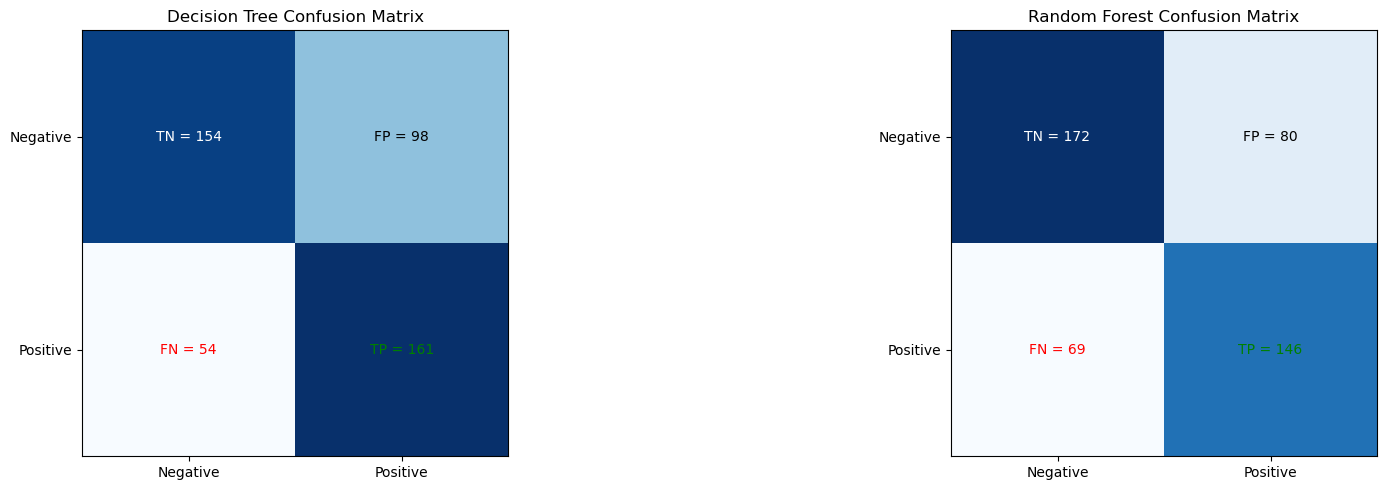

,Predicted Non-user,Predicted User
True Non-User,154,98
True User,54,161


,Predicted Non-user,Predicted User
True Non-User,172,80
True User,69,146



Decision Tree Confusion Matrix:
 [[154  98]
 [ 54 161]]

Random Forest Confusion Matrix:
 [[172  80]
 [ 69 146]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       252
           1       0.62      0.75      0.68       215

    accuracy                           0.67       467
   macro avg       0.68      0.68      0.67       467
weighted avg       0.69      0.67      0.67       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       252
           1       0.65      0.68      0.66       215

    accuracy                           0.68       467
   macro avg       0.68      0.68      0.68       467
weighted avg       0.68      0.68      0.68       467



In [28]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
The decision tree and random forest models were evaluated with various parameters to optimize their performance. For the decision tree model, after tuning with PCA, the best parameters included a maximum depth of 3, no minimum impurity decrease, and a minimum of 5 samples per leaf. This configuration achieved a cross-validation score of 0.68 and a test set accuracy of 0.67. In classification, it showed precision rates of 0.74 for class 0 and 0.62 for class 1, with corresponding recalls of 0.61 and 0.75, resulting in F1-scores of 0.67 and 0.68, respectively. The overall accuracy was 0.67.

Comparatively, the random forest model, optimized with parameters including a maximum depth of 5, minimum samples per leaf of 1, minimum samples split of 7, and 30 estimators, achieved a slightly higher cross-validation score of 0.69 and a test set accuracy of 0.68. Precision for class 0 and class 1 was 0.71 and 0.65, respectively, with recalls of 0.68 and 0.68, resulting in F1-scores of 0.70 and 0.66. The overall accuracy matched that of the decision tree at 0.68.

In summary, both models performed similarly in terms of overall accuracy and class-specific metrics, with the random forest showing marginally better precision for class 0 and comparable recall across both classes. The decision tree exhibited a higher precision for class 1 but with a trade-off in recall compared to the random forest. Further refinements or alternative techniques may be explored to enhance model performance, particularly in improving recall rates for both classes while maintaining or improving overall accuracy.

### Model Comparison <a id='Models'></a>

In [39]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression (Base)'] = ['nan','72.48%', '67.45%', 'Good overall performance, but lower recall for minority class']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ["C=0.1", "68%", "68%", "Moderate precision and recall balance"]
metrics_df.loc['SMOTEN'] = ["C=1", "68%", "68%", "Higher precision but lower recall for minority class"]
metrics_df.loc['SVMSMOTE'] = ["C=0.1", "68%", "68%", "Balanced precision and recall among all"]

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['nan','100%', '61.03%', 'High training accuracy, but lower recall for minority class']
metrics_df.loc['Decision Tree (PCA)'] = [
    "max_depth=3, min_impurity_decrease=0.0, min_samples_leaf=5",
    "67%",
    "68%",
    "Good precision for majority class but moderate performance for minority class"
]

# Random Forest tuned
metrics_df.loc['Random Forest'] = [
    "max_depth=5, min_samples_leaf=1, min_samples_split=7, n_estimators=30",
    "68%",
    "68%",
    "Balanced precision and recall, slightly better than Decision Tree for minority class"
]

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),nan,72.48%,67.45%,"Good overall performance, but lower recall for..."
BorderlineSMOTE,C=0.1,68%,68%,Moderate precision and recall balance
SMOTEN,C=1,68%,68%,Higher precision but lower recall for minority...
SVMSMOTE,C=0.1,68%,68%,Balanced precision and recall among all
Decision Tree (Base),nan,100%,61.03%,"High training accuracy, but lower recall for m..."
Decision Tree (PCA),"max_depth=3, min_impurity_decrease=0.0, min_sa...",67%,68%,Good precision for majority class but moderate...
Random Forest,"max_depth=5, min_samples_leaf=1, min_samples_s...",68%,68%,"Balanced precision and recall, slightly better..."


### Conclusion:

Based on the evaluation of multiple models, the Random Forest emerges as the top performer with a test accuracy of 68% and balanced precision and recall scores. It outperforms other models like Logistic Regression with SMOTE variants and Decision Trees, maintaining robust performance across both classes in the dataset. This indicates its suitability for effectively classifying the data while minimizing errors and maintaining consistency in predictions. Therefore, the Random Forest model is recommended as the best choice for this classification task based on the provided results.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>